In [ ]:
#Enter Key Here: ''
# Name: Abdulaziz Alzahrani


In [ ]:
from IPython.display import clear_output

In [ ]:
%pip install torch torchvision
%pip install matplotlib

clear_output()

In [ ]:
!echo "Downloading 101_Object_Categories for image notebooks"

!curl -L -o 101_ObjectCategories.zip --progress-bar https://data.caltech.edu/records/mzrjq-6wc02/files/caltech-101.zip?download=1
!unzip 101_ObjectCategories.zip
!mv caltech-101/101_ObjectCategories.tar.gz ./101_ObjectCategories.tar.gz
!tar -xzf 101_ObjectCategories.tar.gz
!rm 101_ObjectCategories.tar.gz
!ls

clear_output()

In [ ]:
import random

import torch
from torch.utils.data import Subset

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

In [ ]:
transform = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor(),  # hint: Is something missing?
])

image_dataset = torchvision.datasets.ImageFolder(root='101_ObjectCategories', transform=transform)

In [ ]:
print(len(image_dataset))

9144


label=0


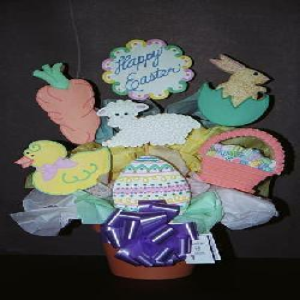

In [ ]:
img, label = image_dataset[50]
print(f'{label=}')
transforms.functional.to_pil_image(img)

# Tasks:

1. Download pretrained Resnet18 model from torchhub
2. Modify the model for object 101 dataset subset (The dataset has 101 distinct classes)
3. Split the dataset between training and validation splits.
4. Fine tune the model for classification on the dataset.
5. Output the fine tuned model's overall accuracy
6. Find a way to show label wise performance/accuracy of the finetuned model

In [ ]:
from torch.utils.data import random_split, DataLoader
import torch.optim as optim
import torch.nn as nn
import torch.hub

In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


In [ ]:
num_classes = 102
batch_size = 64
model.fc = nn.Linear(model.fc.in_features, num_classes)
total_size = len(image_dataset)
train_size = int(0.8*total_size)
val_size = total_size - train_size

train_dataset, val_dataset = random_split(image_dataset, [train_size , val_size])

train_loader = DataLoader(train_dataset, batch_size = batch_size , shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = batch_size , shuffle = True)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

num_epochs = 8

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}, Validation Accuracy: {accuracy}')

Epoch 1, Loss: 0.7571086979430655, Validation Accuracy: 0.9158009841443412
Epoch 2, Loss: 0.2160807505249977, Validation Accuracy: 0.9458720612356479


KeyboardInterrupt: 

In [ ]:
print(f' overall accuracy: {accuracy}')

 overall accuracy: 0.9458720612356479


In [ ]:
class_correct = [0] * 102
class_total = [0] * 102

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()

        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


In [ ]:
for i in range(102):
    print(f'class {i}: {100 * class_correct[i] / class_total[i]}%')

class 0: 90.3225806451613%
class 1: 100.0%
class 2: 97.61904761904762%
class 3: 100.0%
class 4: 100.0%
class 5: 100.0%
class 6: 100.0%
class 7: 77.77777777777777%
class 8: 85.71428571428571%
class 9: 100.0%
class 10: 90.9090909090909%
class 11: 75.0%
class 12: 100.0%
class 13: 90.0%
class 14: 95.45454545454545%
class 15: 100.0%
class 16: 86.66666666666667%
class 17: 88.88888888888889%
class 18: 100.0%
class 19: 83.33333333333333%
class 20: 100.0%
class 21: 100.0%
class 22: 100.0%
class 23: 92.85714285714286%
class 24: 94.11764705882354%
class 25: 100.0%
class 26: 90.9090909090909%
class 27: 82.3529411764706%
class 28: 81.25%
class 29: 86.66666666666667%
class 30: 76.92307692307692%
class 31: 85.71428571428571%
class 32: 100.0%
class 33: 100.0%
class 34: 84.61538461538461%
class 35: 94.73684210526316%
class 36: 100.0%
class 37: 82.3529411764706%
class 38: 66.66666666666667%
class 39: 100.0%
class 40: 100.0%
class 41: 100.0%
class 42: 100.0%
class 43: 70.0%
class 44: 100.0%
class 45: 83.